In [25]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # data visualization library  
import matplotlib.pyplot as plt
%matplotlib inline

In [26]:
coders_2016 = pd.read_csv("2016-data.csv")
coders_2017 = pd.read_csv("2017-data.csv")
print(coders_2016.head())
print(coders_2017.head())

    Age  AttendedBootcamp  BootcampFinish  BootcampFullJobAfter  \
0  28.0               0.0             NaN                   NaN   
1  22.0               0.0             NaN                   NaN   
2  19.0               0.0             NaN                   NaN   
3  26.0               0.0             NaN                   NaN   
4  20.0               0.0             NaN                   NaN   

   BootcampLoanYesNo  BootcampMonthsAgo BootcampName  BootcampPostSalary  \
0                NaN                NaN          NaN                 NaN   
1                NaN                NaN          NaN                 NaN   
2                NaN                NaN          NaN                 NaN   
3                NaN                NaN          NaN                 NaN   
4                NaN                NaN          NaN                 NaN   

   BootcampRecommend  ChildrenNumber       ...       ResourceSoloLearn  \
0                NaN             NaN       ...                    

In [27]:
print(coders_2016.shape)
print(coders_2017.shape)

(15620, 113)
(18175, 136)


In [28]:
coders_2016['Gender'].unique()

array(['male', 'female', nan, 'genderqueer', 'agender', 'trans'], dtype=object)

In [29]:
coders_2016.isnull().sum()

Age                       2007
AttendedBootcamp           240
BootcampFinish           14687
BootcampFullJobAfter     14985
BootcampLoanYesNo        14686
BootcampMonthsAgo        14989
BootcampName             14725
BootcampPostSalary       15290
BootcampRecommend        14683
ChildrenNumber           13066
CityPopulation            1990
CodeEventBootcamp        15578
CodeEventCoffee          13543
CodeEventConferences     12722
CodeEventDjangoGirls     15602
CodeEventGameJam         15598
CodeEventGirlDev         15062
CodeEventHackathons      13198
CodeEventMeetup          15307
CodeEventNodeSchool      15140
CodeEventNone             6720
CodeEventOther           14699
CodeEventRailsBridge     15365
CodeEventRailsGirls      15606
CodeEventStartUpWknd     14877
CodeEventWomenCode       14909
CodeEventWorkshop        15597
CommuteTime               7281
CountryCitizen            1966
CountryLive               2010
                         ...  
PodcastWebAhead          15605
Resource

In [30]:
coders_2016['IsWoman'] = coders_2016.apply(lambda row:  1 if(row["Gender"] == "female") else 0, axis=1)

In [31]:
print(coders_2016['IsWoman'].head())
print(coders_2016['Gender'].head())

0    0
1    0
2    0
3    1
4    1
Name: IsWoman, dtype: int64
0      male
1      male
2      male
3    female
4    female
Name: Gender, dtype: object


In [32]:
subset = coders_2016[['Age', 'CommuteTime', 'HasChildren', 
           'AttendedBootcamp', 'HasDebt',
           'HoursLearning', 'MonthsProgramming', 'Income','IsWoman']]
print(subset.isnull().sum())
print(subset.shape)
subset.dropna(inplace=True)
print(subset.isnull().sum())
print(subset.shape)

Age                   2007
CommuteTime           7281
HasChildren          11608
AttendedBootcamp       240
HasDebt               2010
HoursLearning          678
MonthsProgramming      606
Income                8291
IsWoman                  0
dtype: int64
(15620, 9)
Age                  0
CommuteTime          0
HasChildren          0
AttendedBootcamp     0
HasDebt              0
HoursLearning        0
MonthsProgramming    0
Income               0
IsWoman              0
dtype: int64
(2704, 9)


/Users/mohitsharma/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [33]:
X = subset[['Age', 'CommuteTime', 'HasChildren', 'AttendedBootcamp', 'IsWoman', 'HasDebt','HoursLearning', 'MonthsProgramming']]
# get a vector with our output variable
y = subset['Income']
print('Number of data points: ' + str(len(y)))

Number of data points: 2704


In [34]:
from sklearn.linear_model import ElasticNetCV
regr = ElasticNetCV(cv=10, random_state=0)
regr.fit(X, y)

ElasticNetCV(alphas=None, copy_X=True, cv=10, eps=0.001, fit_intercept=True,
       l1_ratio=0.5, max_iter=1000, n_alphas=100, n_jobs=1,
       normalize=False, positive=False, precompute='auto', random_state=0,
       selection='cyclic', tol=0.0001, verbose=0)

In [35]:
print(regr.intercept_)

46150.0020462


In [36]:
coefficients = pd.DataFrame()
coefficients['columns'] = X.columns
coefficients['coef'] = regr.coef_
print(coefficients)

             columns        coef
0                Age   72.768980
1        CommuteTime  -18.670586
2        HasChildren    2.219416
3   AttendedBootcamp   -0.000000
4            IsWoman   -0.000000
5            HasDebt    0.000000
6      HoursLearning  -34.030109
7  MonthsProgramming  138.014137


In [37]:
variables_non_zero = coefficients[coefficients['coef'] != 0]['columns']
print(variables_non_zero)

0                  Age
1          CommuteTime
2          HasChildren
6        HoursLearning
7    MonthsProgramming
Name: columns, dtype: object


In [38]:
# turn our list of formulas into a variable
X = subset[variables_non_zero]
# fit a glm model
from sklearn.linear_model import LinearRegression
regr = LinearRegression()
regr.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

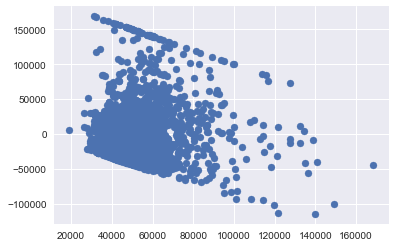

In [39]:
import matplotlib.pyplot as plt
y_pred = regr.predict(X)
residual = y - y_pred
plt.scatter(y_pred,residual)

In [40]:
print(regr.intercept_)

18860.2698496


In [41]:
coefficients = pd.DataFrame()
coefficients['columns'] = X.columns
coefficients['coef'] = regr.coef_
print(coefficients)

             columns         coef
0                Age   817.966881
1        CommuteTime   -11.858553
2        HasChildren  5620.100769
3      HoursLearning  -221.301607
4  MonthsProgramming   139.905039
